In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sinusoidal signal

Here we start by defining the number of samples in our signal and plotting the sinusoidal terms in order to demonstrate the behavior of each term in the Discrete Fourier Transform. As a reminder, the DFT is defined as:
$$
X_k = \sum_{n=0}^{N-1} x_n \left[\cos \left(\frac{2\pi}{N} k n\right) -i \sin\left(\frac{2\pi}{N} k n\right) \right]
$$

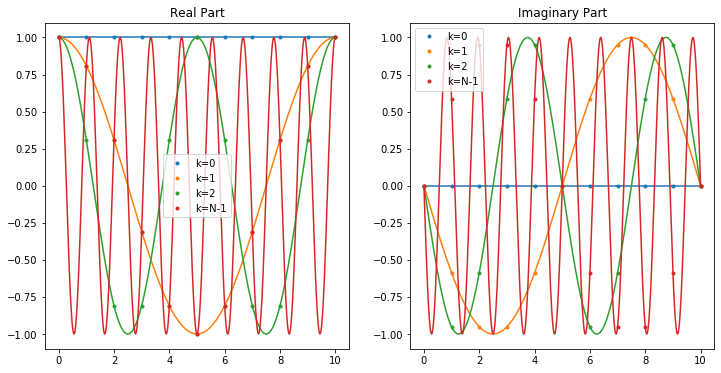

In [2]:
N=10

def freal(n,k):
    return np.cos(2.0*np.pi/N*k*n)
def fimag(n,k):
    return -np.sin(2.0*np.pi/N*k*n)

nn = np.arange(0,N+1)
nsmooth = np.linspace(0,N,1000)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
l = plt.plot(nn,freal(nn,0),'.',label='k=0') # NOTE: l will hold a list of 'handles' to the lines on the plot
plt.plot(nsmooth,freal(nsmooth,0),l[0].get_color()) # the last argument will use tell matplotlib to use the same color as the previous line
l = plt.plot(nn,freal(nn,1),'.',label='k=1')
plt.plot(nsmooth,freal(nsmooth,1),l[0].get_color())
l = plt.plot(nn,freal(nn,2),'.',label='k=2')
plt.plot(nsmooth,freal(nsmooth,2),l[0].get_color())
l = plt.plot(nn,freal(nn,N-1),'.',label='k=N-1')
plt.plot(nsmooth,freal(nsmooth,N-1),l[0].get_color())
plt.legend()
plt.title('Real Part')

plt.subplot(1,2,2)
l = plt.plot(nn,fimag(nn,0),'.',label='k=0') # NOTE: l will hold a list of 'handles' to the lines on the plot
plt.plot(nsmooth,fimag(nsmooth,0),l[0].get_color()) # the last argument will use tell matplotlib to use the same color as the previous line
l = plt.plot(nn,fimag(nn,1),'.',label='k=1')
plt.plot(nsmooth,fimag(nsmooth,1),l[0].get_color())
l = plt.plot(nn,fimag(nn,2),'.',label='k=2')
plt.plot(nsmooth,fimag(nsmooth,2),l[0].get_color())
l = plt.plot(nn,fimag(nn,N-1),'.',label='k=N-1')
plt.plot(nsmooth,fimag(nsmooth,N-1),l[0].get_color())
plt.title('Imaginary Part')
plt.legend()
plt.show()

# Spectrum of the sawtooth wave

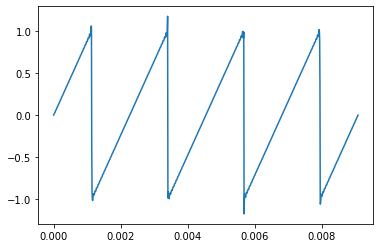

In [3]:
# compute fourier series expansion for sawtooth wave
T = 1./440.
h = 2./T
def sawtooth_series(t,T,nmin=1,nmax=10):
    # Recall - the sawtooth had period 2*T. Convert back to period T.
    T=T/2.
    # sum over n=1,2,...nmax
    f=np.zeros_like(t)
    for n in range(nmin,nmax+1):
        f = f - 2.0*h*T/n/np.pi*(-1)**n * np.sin(n*np.pi*t/T)
    return f

# define the duration of the signal, for plotting
tplot = 4*T
tvec = np.linspace(0,tplot,1000)
dt = tvec[1]-tvec[0]

x = sawtooth_series(tvec,T,1,200)

plt.figure()
plt.plot(tvec,x)
plt.show()

## Calculate the DFT using NumPy FFT

In [4]:
N=len(x)
Y = np.fft.fft(x,N)
f = np.fft.fftfreq(N,dt)

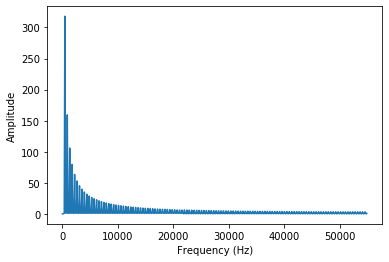

In [5]:
plt.figure()
# only plot f >0
mask = f>=0
plt.plot(f[mask],abs(Y[mask]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

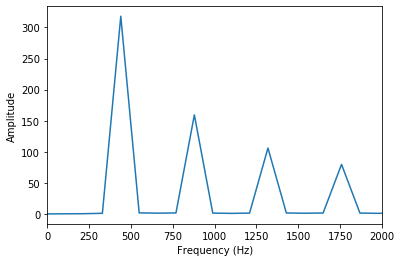

In [6]:
# zoom in near 440 Hz
plt.figure()
# only plot f >0
mask = f>=0
plt.plot(f[mask],abs(Y[mask]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim((0,2000))
plt.show()

# Inverse FFT

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


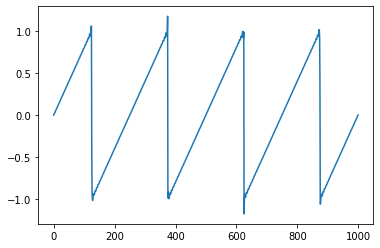

In [7]:
x_inv = np.fft.ifft(Y,N)
plt.figure()
plt.plot(x_inv)
plt.show()

# First steps towards filtering

**Low Pass Filter** - remove frequencies above a specific frequency

**High Pass Filter** - remove frequencies below a specific frequency

The basic idea here is to:
1. Identify frequencies above or below a cutoff frequency.
2. Set the corresponding terms in the Fourier coefficient vectors equal to zero.
3. use the Inverse Fourier Transform to reconstruct the time series.

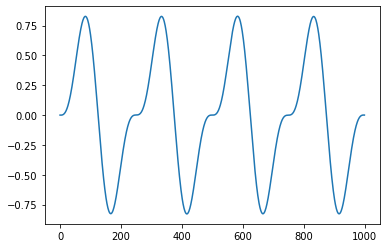

In [8]:
# Low-pass filter
fmask = np.abs(f) > 1000. 
Y_filt = Y.copy()
Y_filt[fmask] *= 0.0
x_inv = np.fft.ifft(Y_filt,N)
plt.figure()
plt.plot(x_inv)
plt.show()

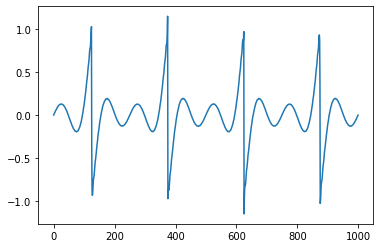

In [9]:
# High-pass filter
fmask = np.abs(f) < 1000. 
Y_filt = Y.copy()
Y_filt[fmask] *= 0.0
x_inv = np.fft.ifft(Y_filt,N)
plt.figure()
plt.plot(x_inv)
plt.show()